# Visualization with Matplotlib
Matplotlib is a plotting library modeled after Matlab's plotting capabilities. Matplot works with basic Python objects as well as Numpy arrays, and is integrated into Pandas for quick DataFrame plotting.<br>
Plot types include line plots, scatter plots, image plots, contour plots, histograms and others. Matplotlib also allows for a wide variety of styling options. While Matplotlib was originally designed only for 2-dimensional plots, an add-on toolkit, `mpl_toolkits`, is available for some basic 3-d plotting.

In [79]:
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('classic')

### Pyplot
The `Pyplot` module gives us an easy interface for Matplotlib plotting, including convenience methods and render handling. You can think of `Pyplot` as a canvas which gives you access to plotting operations supported by `Matplotlib`. All plotting will be done on the canvas and calling `Pyplot`'s `show()` function will render the canvas.

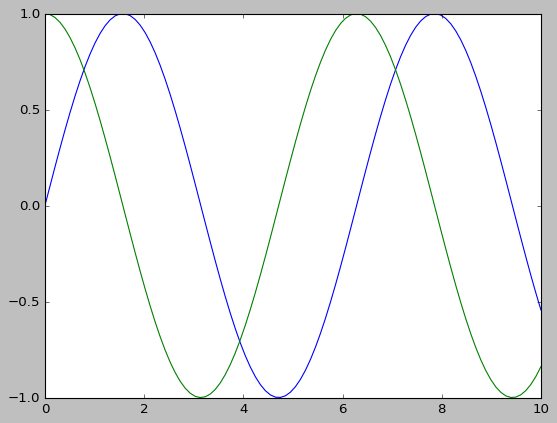

In [80]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()


*Note that both plots were created on the same axes*

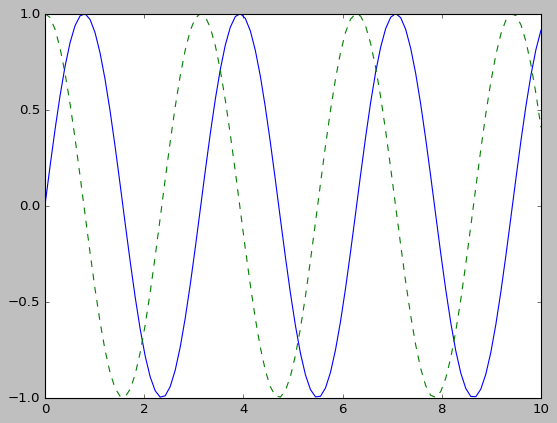

In [81]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(2*x), '-')
plt.plot(x, np.cos(2*x), '--')

*Jupyter's environment does not require a call to the `show()` function. This is done implicitly.*

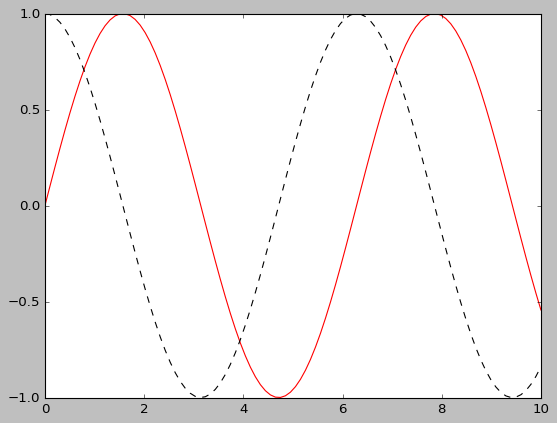

In [82]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'k--')
plt.savefig('sinus.png')

*We can call the `savefig()` to save the plot to an image file.*

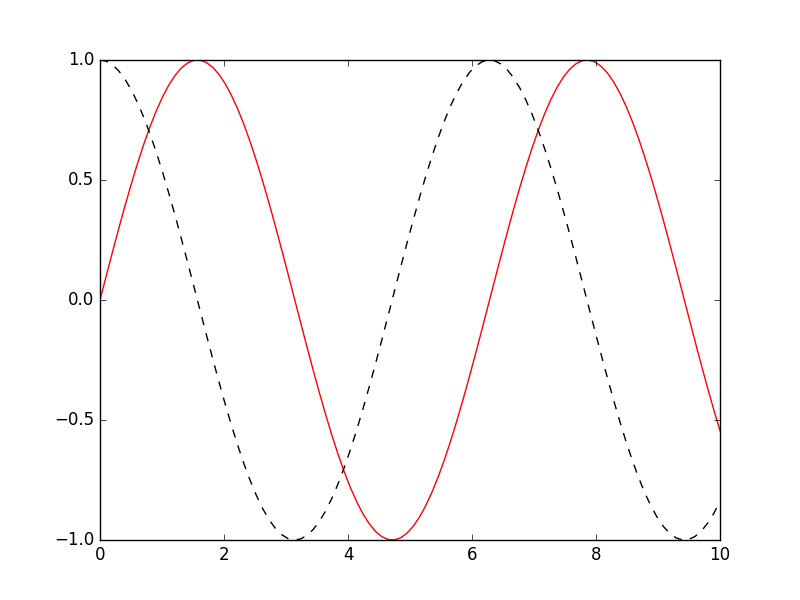

In [83]:
from IPython.display import Image
Image('sinus.png')

## Separate plots
In order to display plot separately, we must create a figure on the canvas with multiple plot axes. This can be done using 2 methods as follows. The first is a **stateful** interface, where we set the state of `Pyplot` to reference the axes we will be plotting on before each plot. The second is an **object oriented** interface, where we call plotting functions for each axes object.

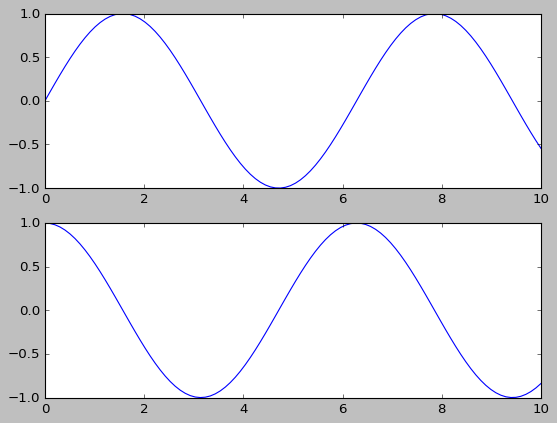

In [84]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

plt.show()

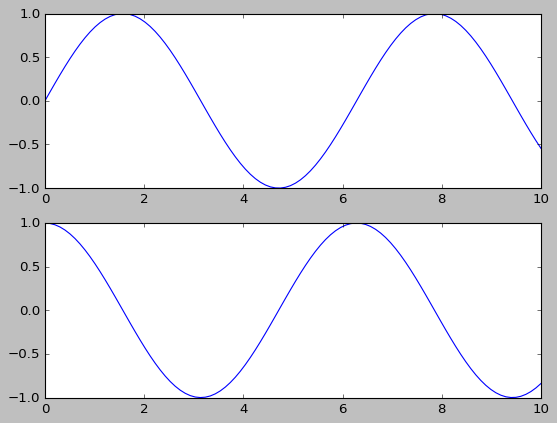

In [85]:
# First create a grid of plots
# ax will be an array of two Axes objects, fig will be the figure object
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
plt.show()

## Plot Color and Styles

In [86]:
plt.style.use('seaborn-whitegrid')

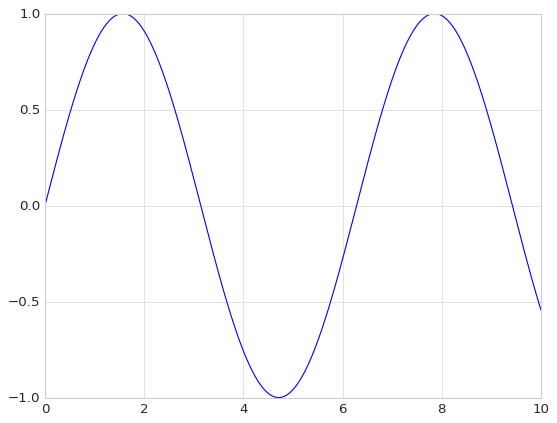

In [87]:
x = np.linspace(0, 10, 1000)
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x))
plt.show()

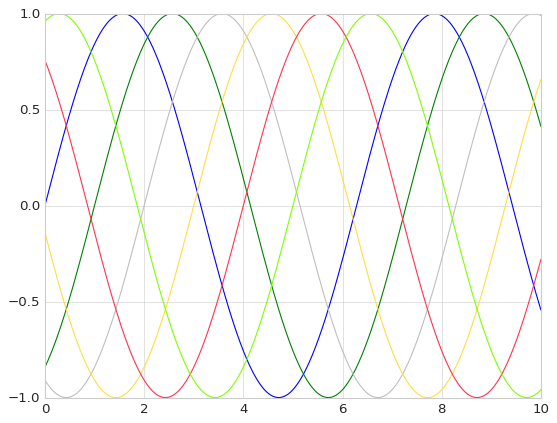

In [88]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported
plt.show()

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

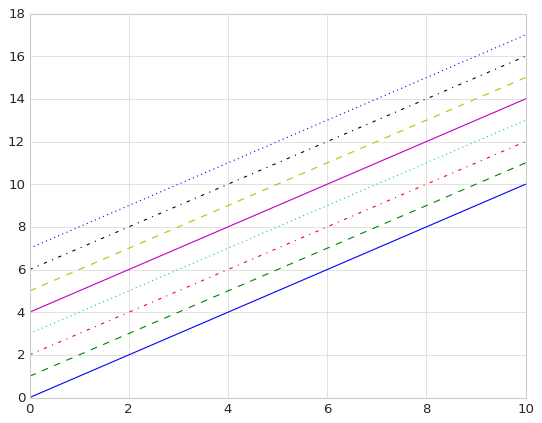

In [89]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted
plt.show()

##### Shorthand Styling
All line styles but only basic colors are supported in this method (rgbcmykw)

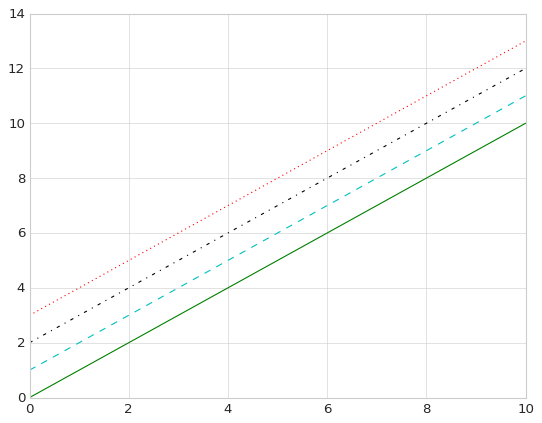

In [90]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red
plt.show()

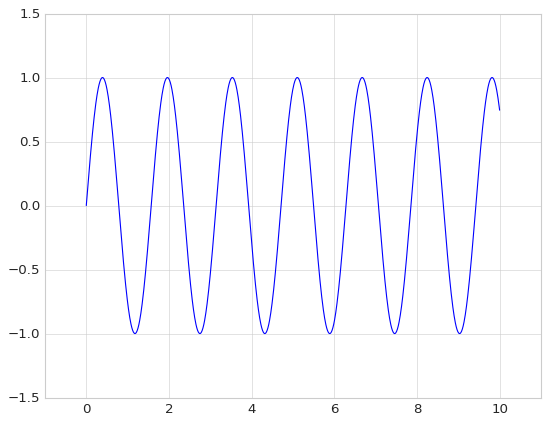

In [91]:
plt.plot(x, np.sin(4*x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.show()

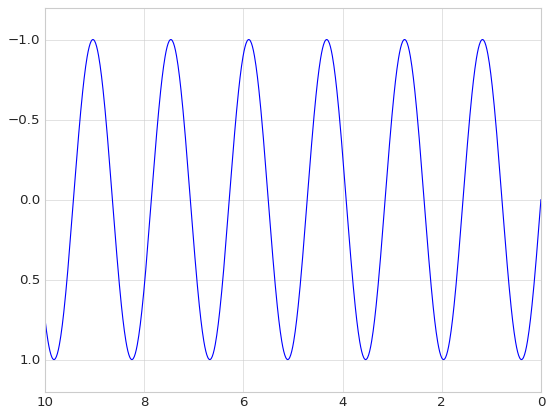

In [92]:
plt.plot(x, np.sin(4*x))

plt.xlim(10, 0) # reverse axes
plt.ylim(1.2, -1.2); # reverse axes

*You can also reverse the axes order.*

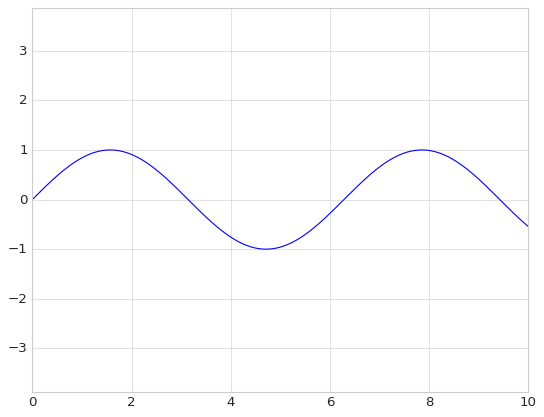

In [93]:
plt.plot(x, np.sin(x))
plt.axis('equal')
plt.show()


##### You can set the axes for each subplot

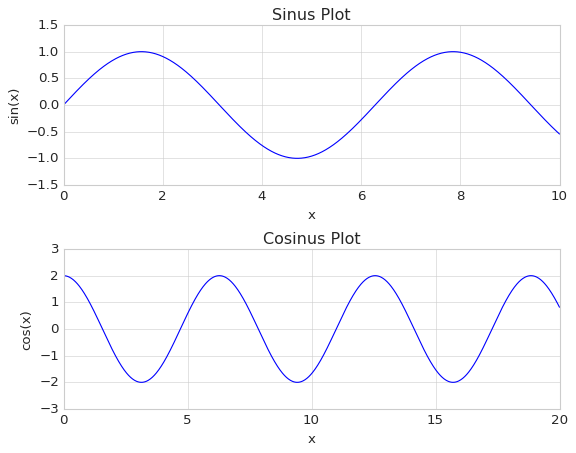

In [94]:

fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.4)
ax[0].plot(x, np.sin(x))
ax[1].plot(2*x, 2*np.cos(2*x))
ax[0].set(xlim=(0, 10), ylim=(-1.5, 1.5),
       xlabel='x', ylabel='sin(x)',
       title='Sinus Plot');
ax[1].set(xlim=(0, 20), ylim=(-3, 3),
       xlabel='x', ylabel='cos(x)',
       title='Cosinus Plot');
plt.show()

### Labeling

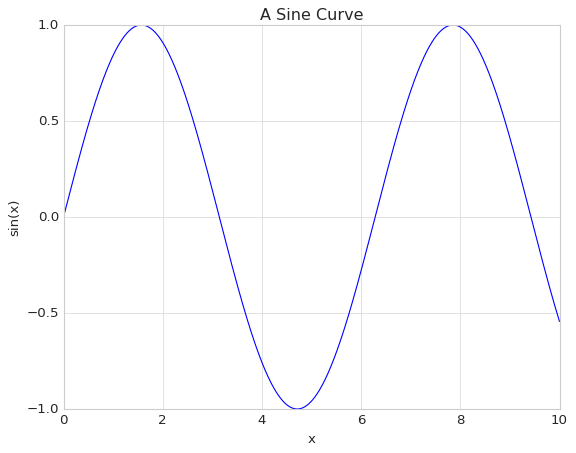

In [95]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

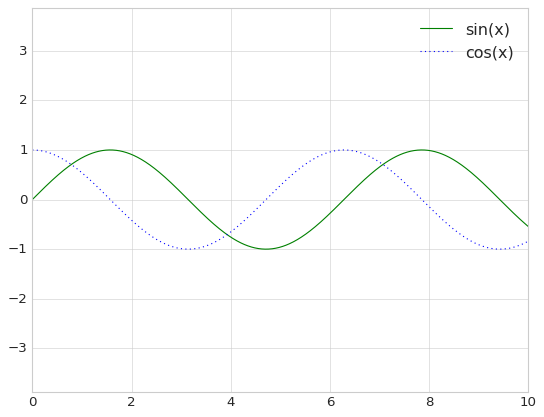

In [96]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()
plt.show()

## Scatter Plots
For the basic functionalities of `Matplotlib` we experimented with line plots. This is just one of many plot types offered by `Matplotlib`. We will now discuss the scatter plot, which is most useful when dealing with sampled data.

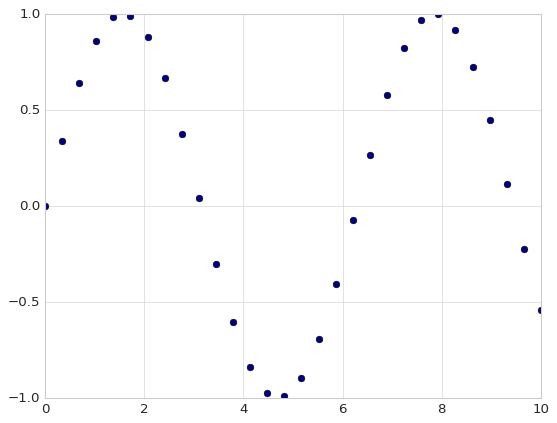

In [97]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='navy')

*Using a dot-style instead of a line style in the `plot` method gives us a simple scatter plot.*

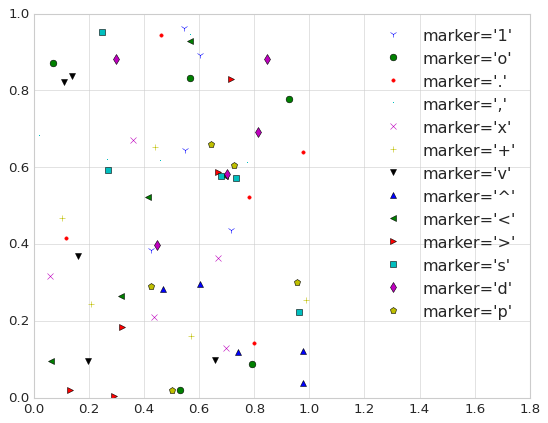

In [98]:
rng = np.random.RandomState(0)
for marker in ['1','o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd','p']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

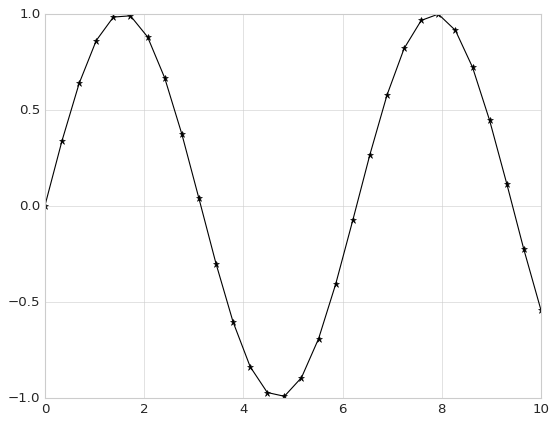

In [99]:
plt.plot(x, y, '-*k');

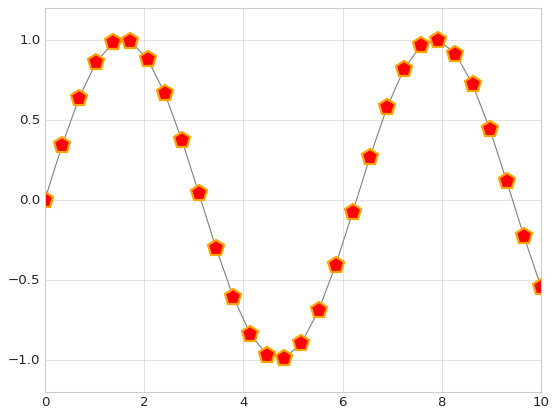

In [100]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=1,
         markerfacecolor='red',
         markeredgecolor='orange',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### A more powerful scatter plot tool - `plt.scatter` 
The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.<br>
*Note: this functionality comes at the cost of efficiency - scatter plots with many data points using this method may be computationally intensive and reduce performance.*

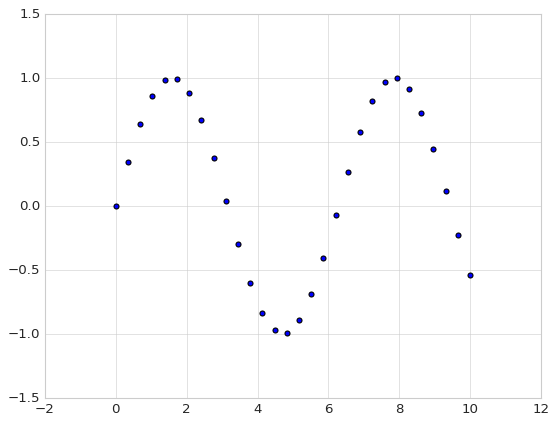

In [101]:
plt.scatter(x, y, marker='o');

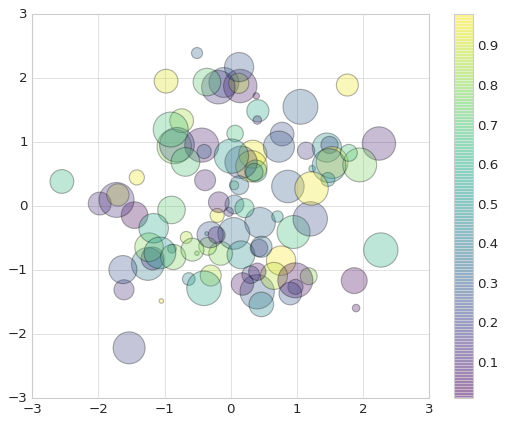

In [102]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### Example - Diamonds

In [103]:
df = pd.read_csv('diamonds.csv')
print(df.head())

   #  carat      cut color clarity  depth  table  price     x     y     z
0  1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1  2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2  3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3  4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4  5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


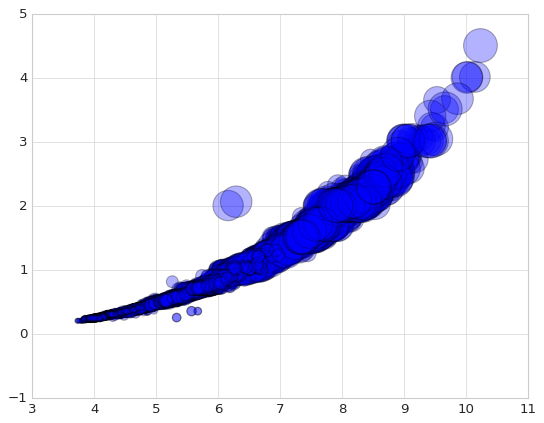

In [104]:
diamonds = df.loc[((df.y-df.x).abs()<0.1) & (df.x>1) ]
plt.scatter(diamonds.x, diamonds.carat, s=diamonds.price/20, alpha=0.3,
            cmap='jet')

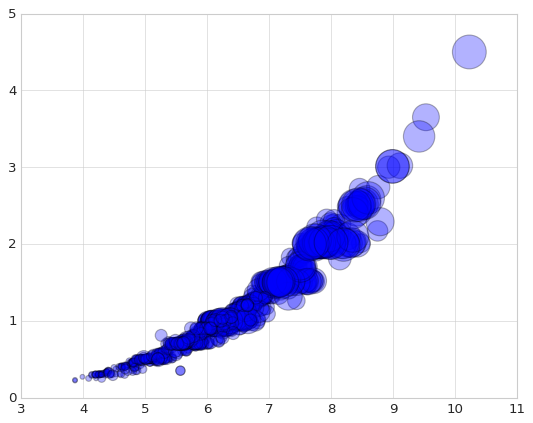

In [105]:
diamonds = df.loc[((df.y-df.x).abs()<0.1) & (df.x>1) & (df.cut=="Fair")]
plt.scatter(diamonds.x, diamonds.carat, s=diamonds.price/20, alpha=0.3,
            cmap='jet')

In [106]:
sorted_color=sorted(df.color.unique())
sorted_color

['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [107]:
color_cat = pd.Categorical(diamonds.color,
  ordered=True,
  categories=sorted_color
)
color_cat.codes

array([1, 2, 2, ..., 5, 3, 0], dtype=int8)

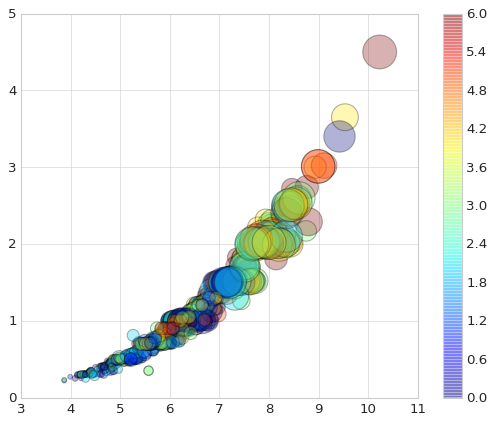

In [108]:
plt.scatter(diamonds.x, diamonds.carat, c=color_cat.codes,s=diamonds.price/20, alpha=0.3,
            cmap='jet')
plt.colorbar()
plt.show()

In [109]:
print(df.clarity.unique())
sorted_clarity = ['I1','SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF']

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [110]:
clarity_cat = pd.Categorical(diamonds.clarity,
  ordered=True,
  categories=sorted_clarity
)
clarity_cat.codes

array([4, 4, 4, ..., 1, 1, 3], dtype=int8)

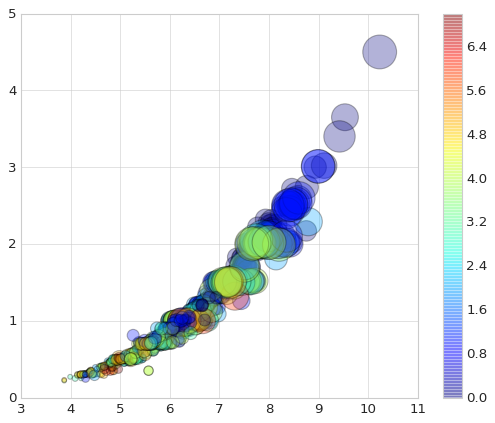

In [111]:
plt.scatter(diamonds.x, diamonds.carat, c=clarity_cat.codes,s=diamonds.price/20, alpha=0.3,
            cmap='jet')
plt.colorbar()
plt.show()

### Example - Population

In [112]:
cities = pd.read_csv('california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


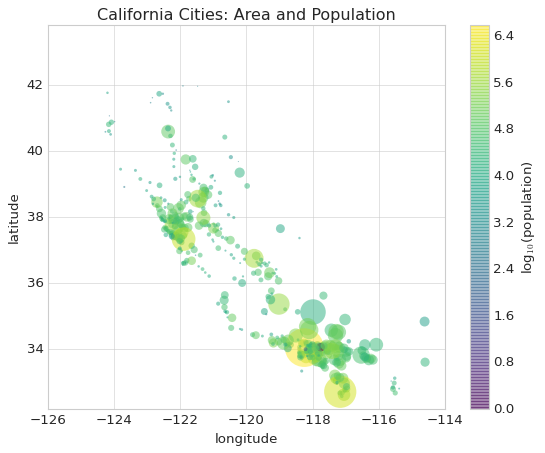

In [113]:

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_land_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')


plt.title('California Cities: Area and Population');

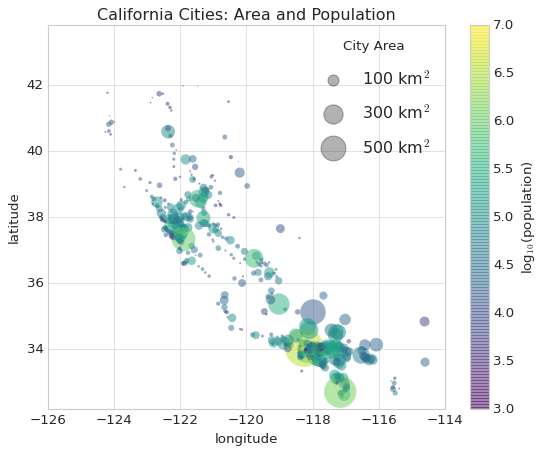

In [114]:
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis("equal")
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) #limit color scale to create better variation
plt.title('California Cities: Area and Population');
# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

*The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified. By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.*

### Contour Plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.

In [115]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#### `contour`
Takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. 

In [116]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y) #create a 2-d matrix from each array 
Z = f(X, Y)

print(X, X.shape)
print(Z,Z.shape)

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]] (40, 50)
[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.8275558  -0.80744041 ...  0.93467448  0.77467433
   0.55894214]
 [-0.83907153 -0.820263   -0.79266951 ...  0.98503397  0.88847607
   0.73757604]
 ...
 [-0.83907153 -0.48696962 -0.02692065 ...  0.98525345  0.79584263
   0.46799565]
 [-0.83907153 -0.47558005 -0.00130271 ...  0.93488414  0.6993547
   0.37933079]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]] (40, 50)


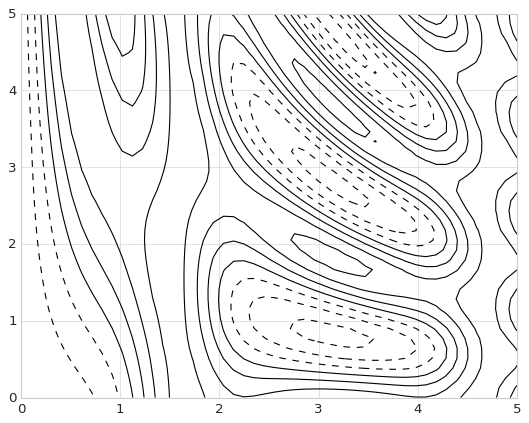

In [117]:
plt.contour(X, Y, Z, colors='black');

*When a single color is used, dashed lines represent negative values.*

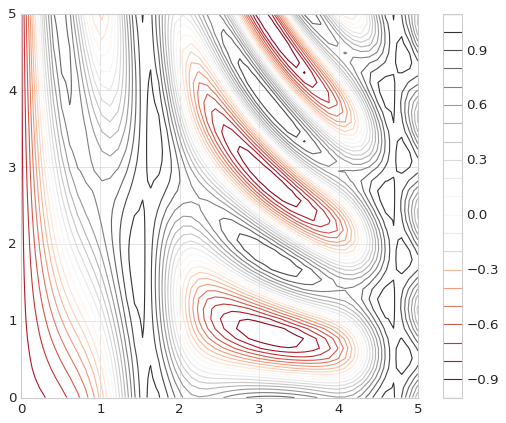

In [118]:
plt.contour(X, Y, Z, 20, cmap='RdGy');
plt.colorbar();

#### `contourf`
Fills the white spaces for better visualization.

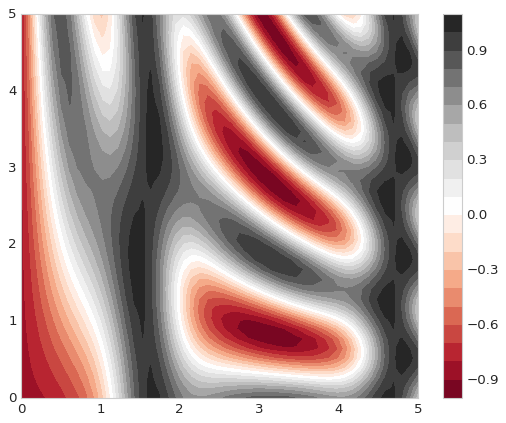

In [119]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

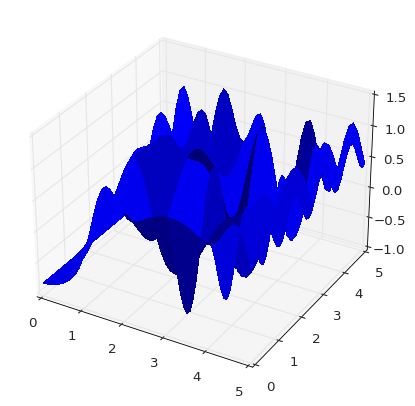

In [120]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

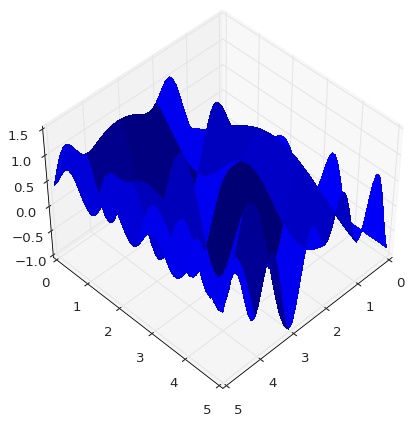

In [121]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(45, 45)
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

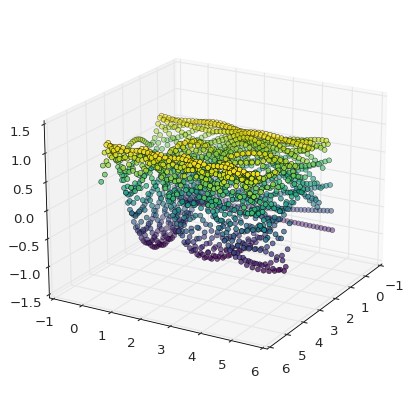

In [122]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5)
ax.view_init(20, 30)
plt.show()

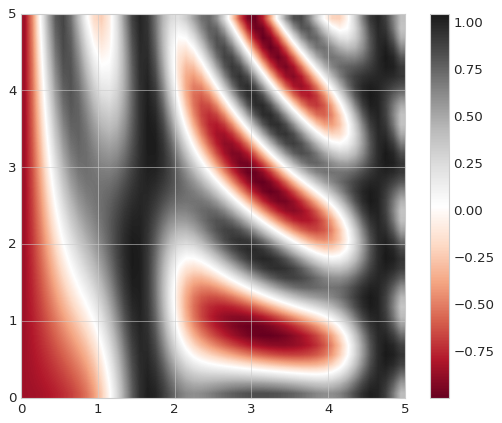

In [123]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy',aspect=1)
plt.colorbar()
plt.show()

#### Example - wildfires

In [124]:
fires1 = pd.read_csv('fire_archive_M6_101673.csv')
fires2 = pd.read_csv('fire_nrt_M6_101673.csv')
fires = pd.concat([fires1,fires2])
fires.latitude = fires.latitude.round(0)
fires.longitude = fires.longitude.round(0)
fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-12.0,142.0,311.4,4.2,1.9,2019-09-01,14,Terra,MODIS,23,6.3,297.0,40.2,D,0.0
1,-12.0,142.0,310.2,4.2,1.9,2019-09-01,14,Terra,MODIS,18,6.3,296.9,33.5,D,0.0
2,-12.0,142.0,310.1,4.2,1.9,2019-09-01,14,Terra,MODIS,27,6.3,296.7,36.0,D,0.0
3,-13.0,143.0,310.4,3.8,1.8,2019-09-01,14,Terra,MODIS,35,6.3,298.1,28.2,D,0.0
4,-13.0,143.0,314.3,3.6,1.8,2019-09-01,14,Terra,MODIS,56,6.3,299.4,43.5,D,0.0


In [125]:
m=fires.groupby(['latitude','longitude']).mean()
m.head()


brightness      scan     track    acq_time  confidence  \
latitude longitude                                                           
-43.0    146.0      342.757692  1.057692  1.026923  512.461538   77.500000   
         147.0      325.175000  1.150000  1.058333  352.583333   74.333333   
         148.0      333.390000  1.760000  1.260000  756.400000   55.400000   
-42.0    146.0      306.366667  1.100000  1.033333  415.000000   45.000000   
         147.0      320.250000  1.061111  1.027778  308.888889   62.611111   

                    bright_t31        frp  type  
latitude longitude                               
-43.0    146.0      290.988462  68.292308   0.0  
         147.0      297.850000  25.600000   0.0  
         148.0      290.420000  82.740000   0.0  
-42.0    146.0      287.266667   9.766667   0.0  
         147.0      293.144444  34.972222   0.0

In [126]:
bright=m.pivot_table(index='latitude',columns='longitude',values='brightness').T.values
X_unique = np.sort(fires.latitude.unique())
Y_unique = np.sort(fires.longitude.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

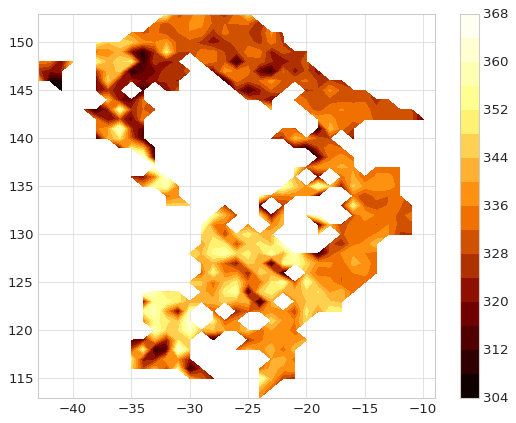

In [127]:

# Generate a contour plot
plt.contourf(X, Y, bright,levels=20, cmap=plt.cm.afmhot)
plt.colorbar()
plt.show()

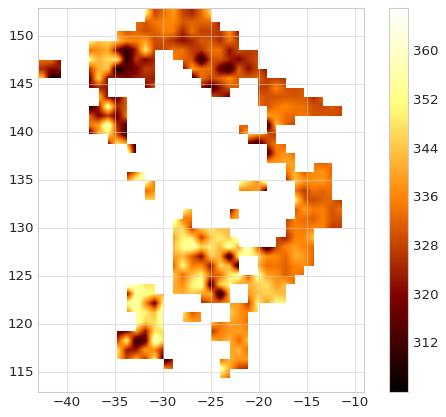

In [128]:
plt.imshow(bright, extent=[X_unique.min(),X_unique.max(),Y_unique.min(),Y_unique.max()], origin='lower',
           cmap=plt.cm.afmhot,aspect=1)
plt.colorbar()
plt.show()

### Histogtams

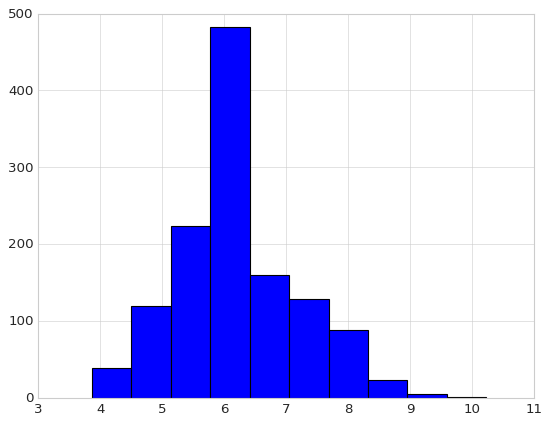

In [129]:
hist_data=diamonds.x
plt.hist(hist_data)
plt.show()

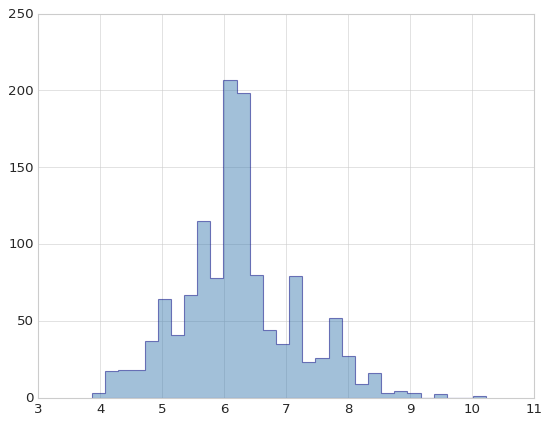

In [130]:
plt.hist(hist_data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='navy')
plt.show()

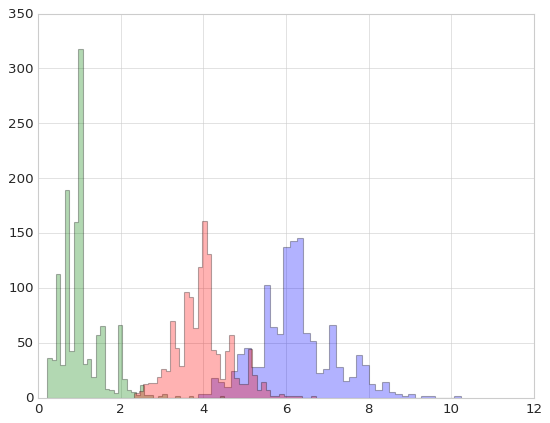

In [131]:

kwargs = dict(histtype='stepfilled', alpha=0.3,  bins=40) #density normalizes data

plt.hist(hist_data, **kwargs)
plt.hist(diamonds.carat, **kwargs)
plt.hist(diamonds.z, **kwargs)
plt.show()

### Subplots

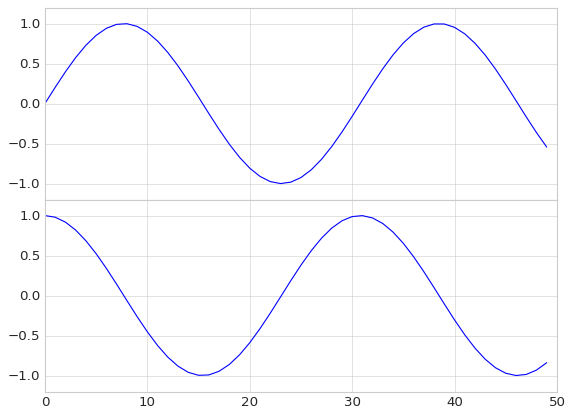

In [132]:
fig = plt.figure() # create figure 
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) #add axes object: left, bottom, width, height
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.show()

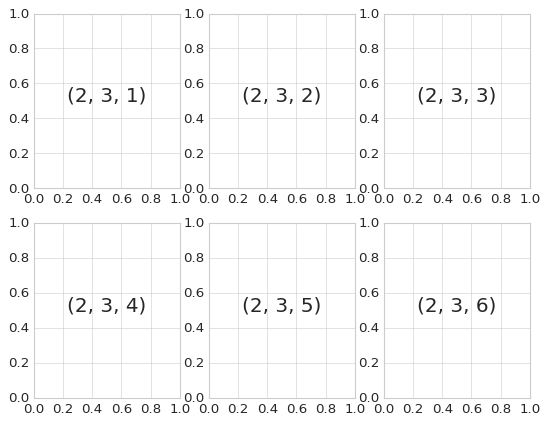

In [133]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.show()

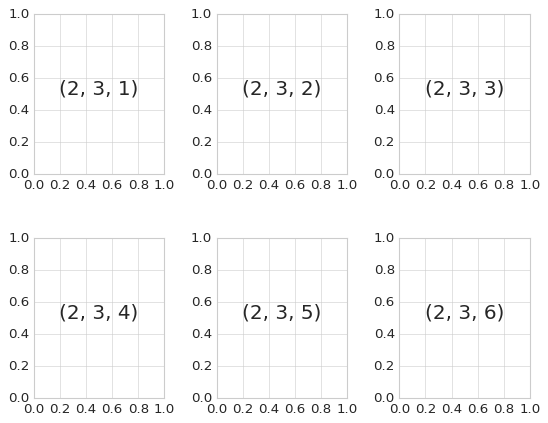

In [134]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
plt.show()

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)


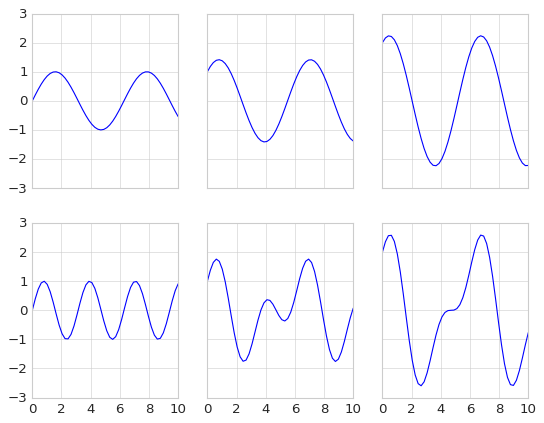

In [135]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for ind,axis in np.ndenumerate(ax):
    print(ind)
    axis.plot(x,np.sin((ind[0]+1)*x)+ind[1]*np.cos(x))
plt.show()

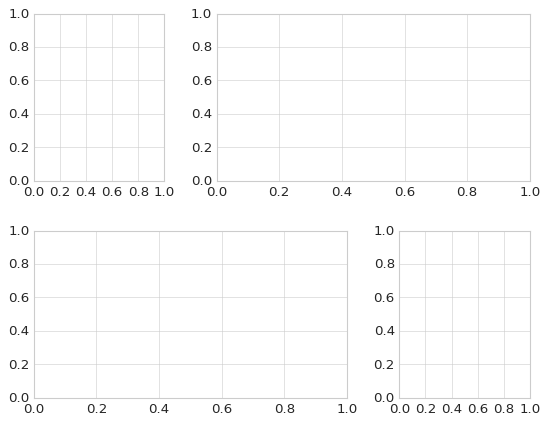

In [136]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) #convience method for creating grid coordinates recognized by subplot
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])
plt.show()

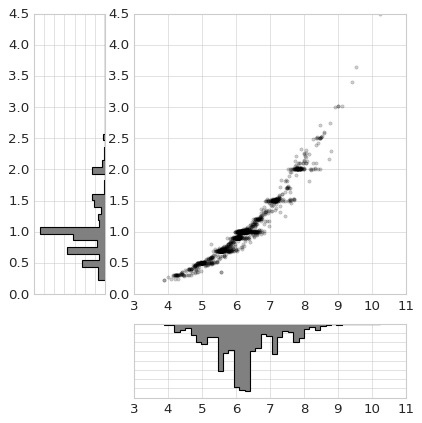

In [137]:

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(diamonds.x, diamonds.carat, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(diamonds.x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(diamonds.carat, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()
plt.show()